# Library used

In [160]:
import folium as folium
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Useful functions

In [161]:
# Returns tree number
def getTreeNumber(dataF):
    count = len(dataF)
    print("Total number of trees:", count, '\n')
    return count


# Returns data frame columns
def getColumns(dataF):
    return dataF.columns.values


# Prints data frame's columns
def printColumns(col):
    print(col)
    print(len(col))

# Retrieving data from the csv file

In [162]:
filename = "./resources/p2-arbres-fr.csv"
data = pd.read_csv(filename, encoding='utf-8', sep=';')
data

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200132,2024741,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170151,NaN,Castanea,fargesii,NaN,0,0,NaN,0.0,48.821957,2.456264
200133,2024742,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170152,Arbre aux mouchoirs,Davidia,involucrata,NaN,0,0,NaN,0.0,48.823254,2.457935
200134,2024743,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170153,Peuplier,Populus,simonii,NaN,0,0,NaN,0.0,48.822907,2.457970
200135,2024744,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170154,Chêne,Quercus,n. sp.,NaN,0,0,NaN,0.0,48.822522,2.455956


# Boxplots

## Finding maximum circumference

<AxesSubplot:>

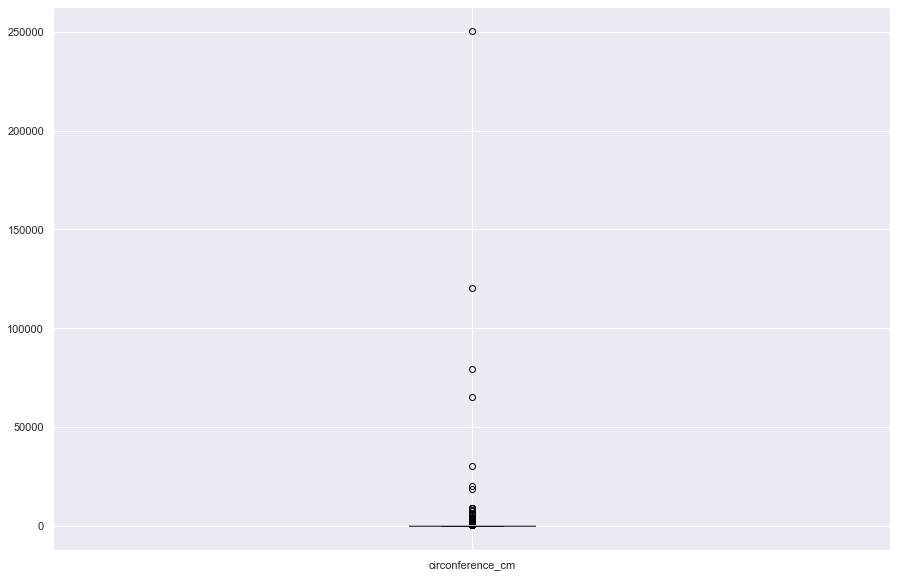

In [163]:
circum_boxplot = data.boxplot(column=['circonference_cm'])
circum_boxplot

<AxesSubplot:>

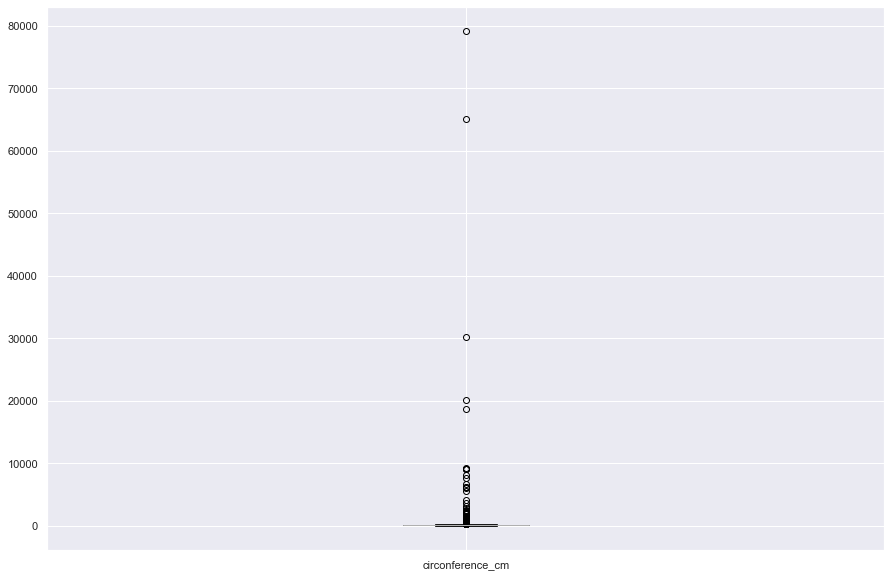

In [164]:
data.drop(data.index[(data["circonference_cm"] > 120000)], axis=0, inplace=True)
circum_boxplot = data.boxplot(column=['circonference_cm'])
circum_boxplot

<AxesSubplot:>

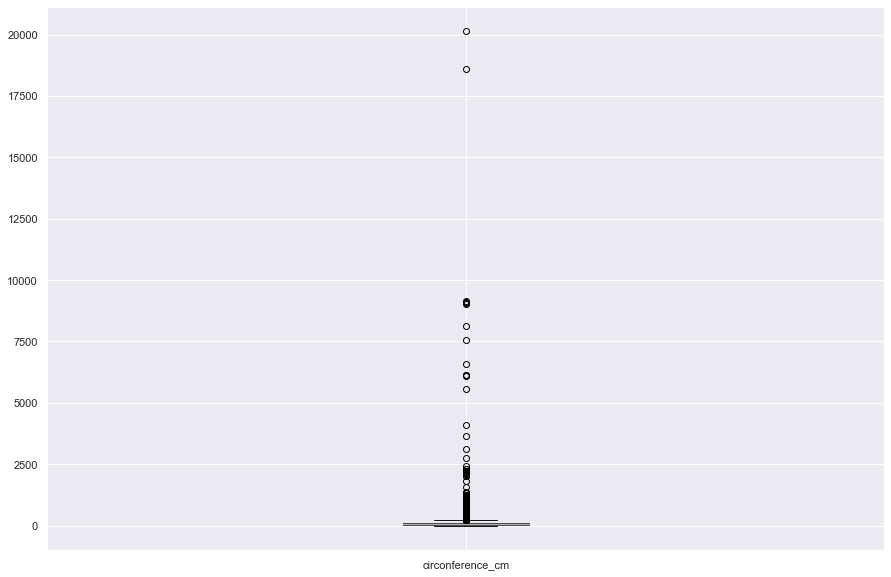

In [165]:
data.drop(data.index[(data["circonference_cm"] > 30000)], axis=0, inplace=True)
circum_boxplot = data.boxplot(column=['circonference_cm'])
circum_boxplot

<AxesSubplot:>

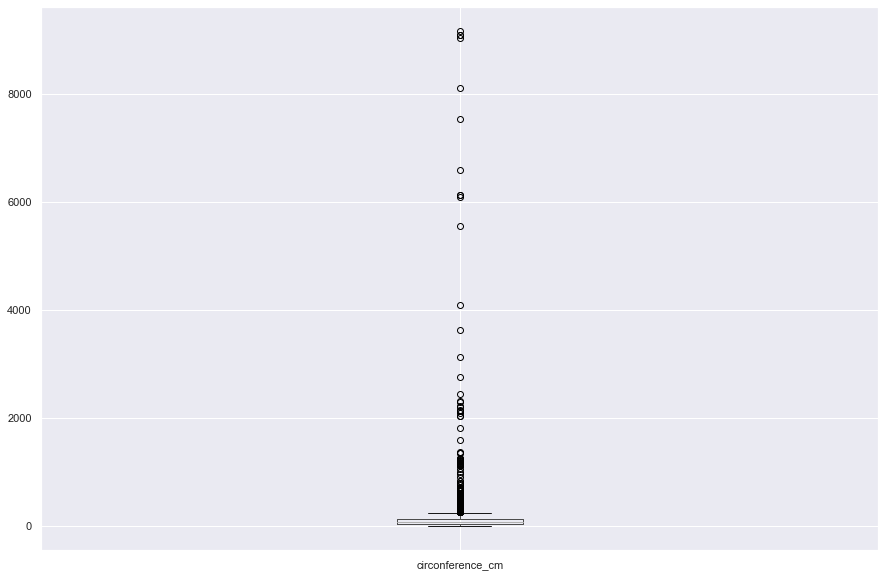

In [166]:
data.drop(data.index[(data["circonference_cm"] > 10000)], axis=0, inplace=True)
circum_boxplot = data.boxplot(column=['circonference_cm'])
circum_boxplot

<AxesSubplot:>

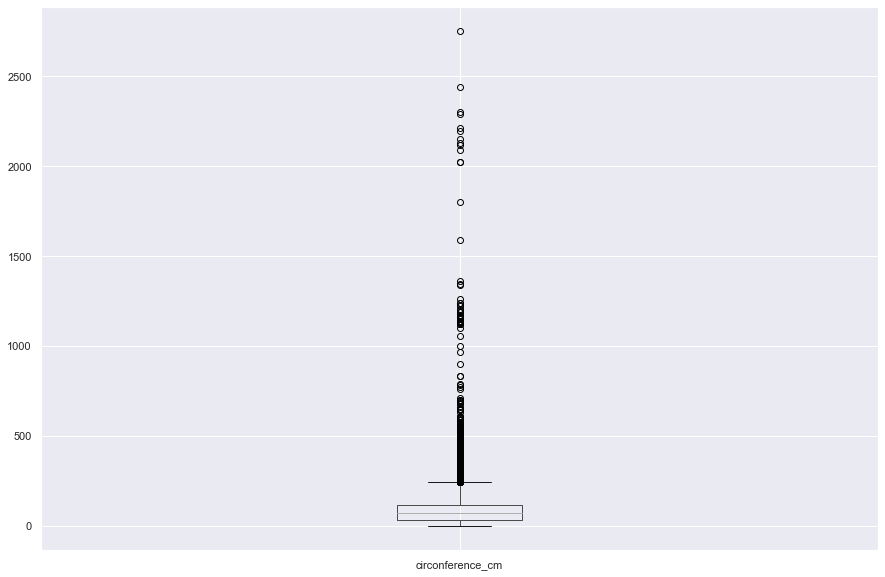

In [167]:
data.drop(data.index[(data["circonference_cm"] > 3000)], axis=0, inplace=True)
circum_boxplot = data.boxplot(column=['circonference_cm'])
circum_boxplot

<AxesSubplot:>

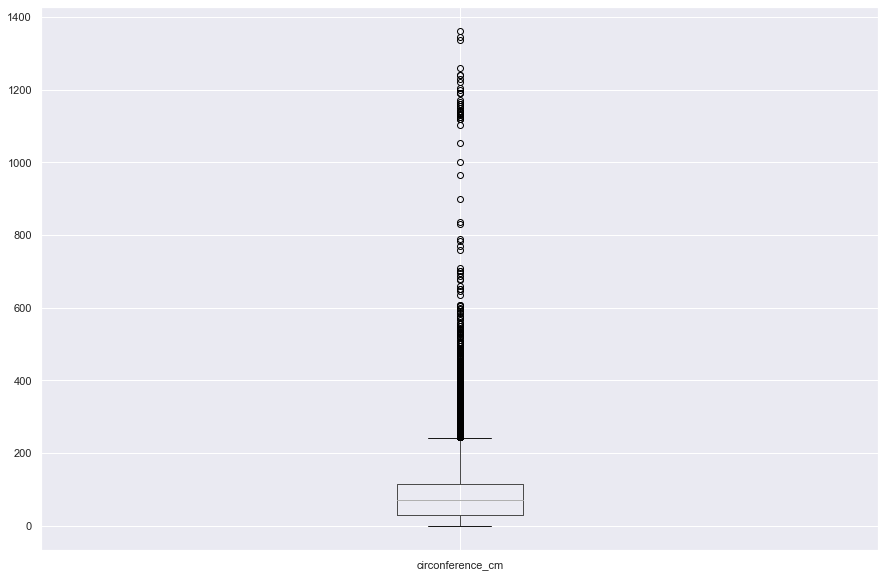

In [168]:
data.drop(data.index[(data["circonference_cm"] > 1500)], axis=0, inplace=True)
circum_boxplot = data.boxplot(column=['circonference_cm'])
circum_boxplot

<AxesSubplot:>

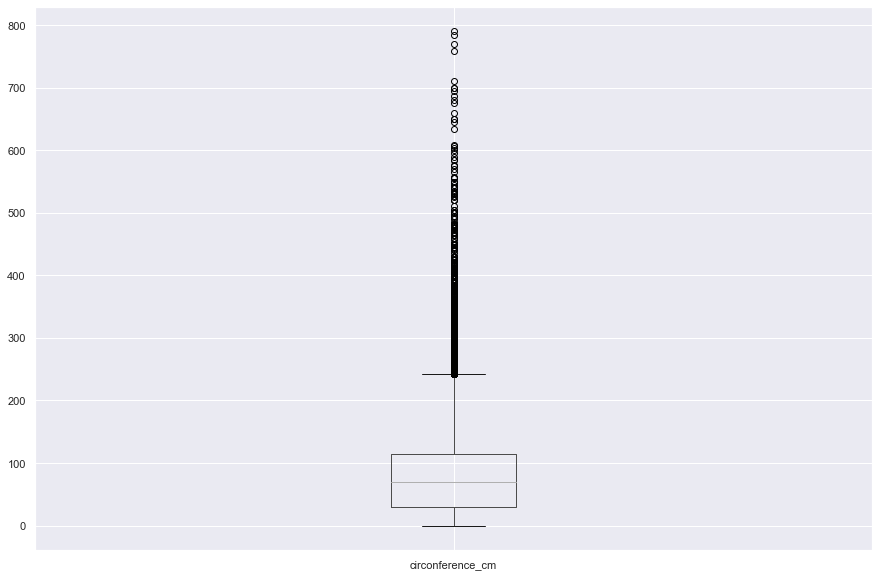

In [169]:
data.drop(data.index[(data["circonference_cm"] > 800)], axis=0, inplace=True)
circum_boxplot = data.boxplot(column=['circonference_cm'])
circum_boxplot

By reducing the maximum value for maximum circumference, we made a much more readable boxplot that will help us remove absurd values from the database.

<AxesSubplot:>

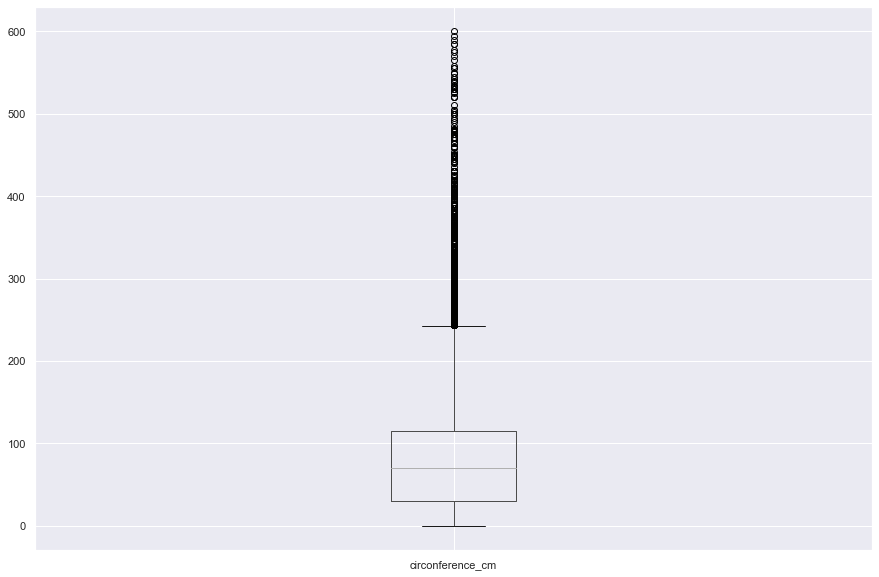

In [170]:
data.drop(data.index[(data["circonference_cm"] > 600)], axis=0, inplace=True)
circum_boxplot = data.boxplot(column=['circonference_cm'])
circum_boxplot

# Finding maximum height

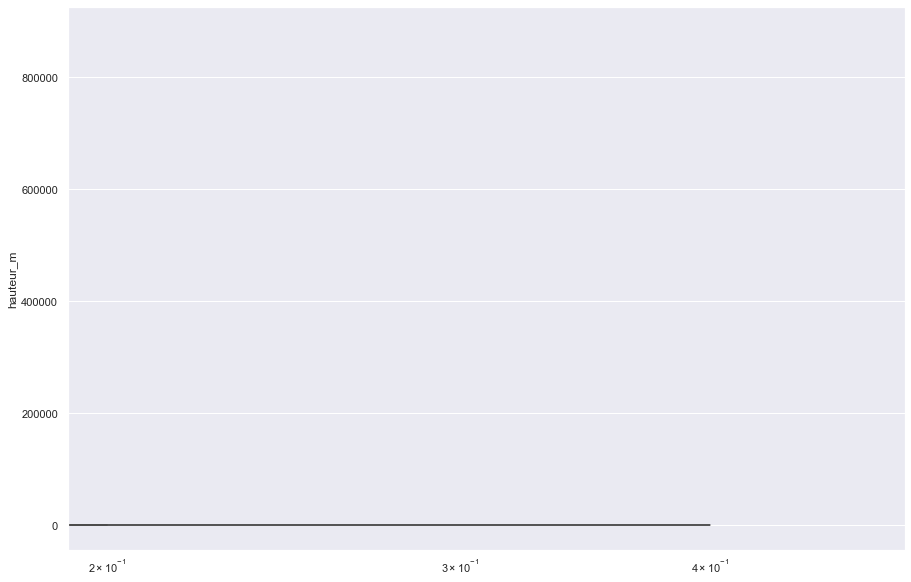

In [171]:
# TODO  add log to boxplot
ax = sns.boxplot(y=data["hauteur_m"])
ax.set_xscale('log')

<AxesSubplot:>

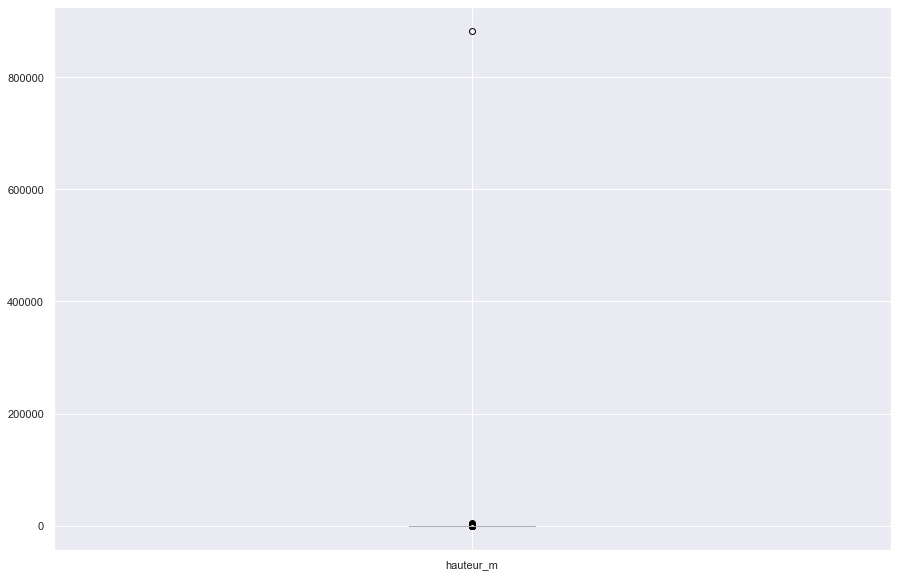

In [172]:
height_boxplot = data.boxplot(column=['hauteur_m'])
height_boxplot

<AxesSubplot:>

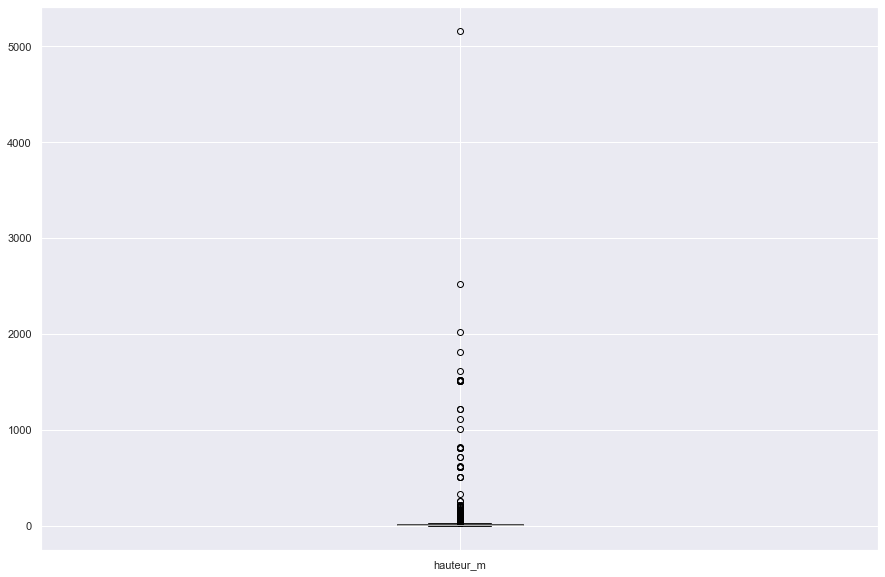

In [173]:
data.drop(data.index[(data["hauteur_m"] > 50000)], axis=0, inplace=True)
height_boxplot = data.boxplot(column=['hauteur_m'])
height_boxplot

<AxesSubplot:>

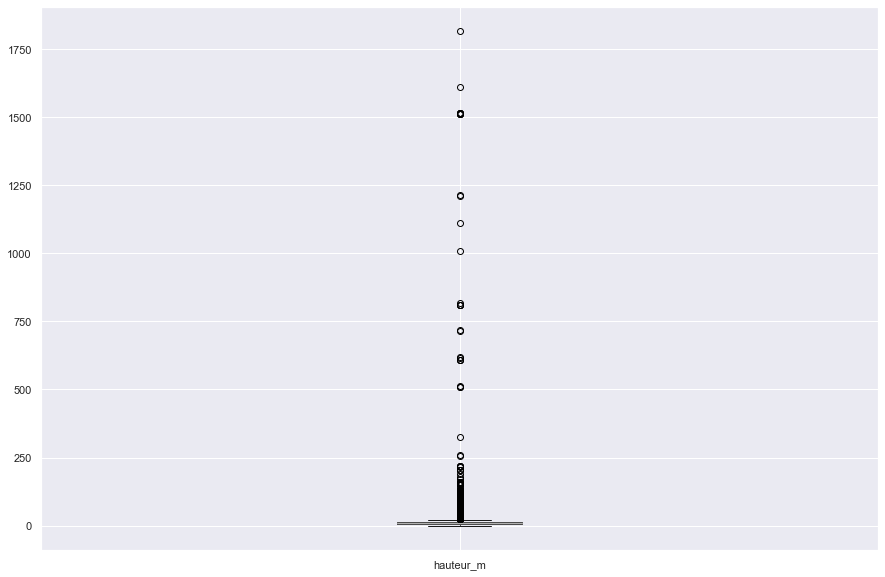

In [174]:
data.drop(data.index[(data["hauteur_m"] > 2000)], axis=0, inplace=True)
height_boxplot = data.boxplot(column=['hauteur_m'])
height_boxplot

<AxesSubplot:>

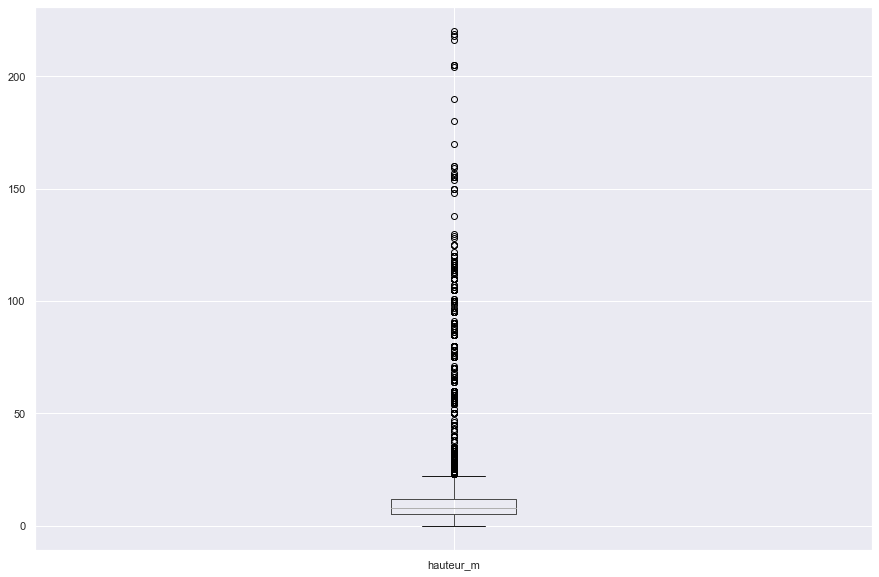

In [175]:
data.drop(data.index[(data["hauteur_m"] > 250)], axis=0, inplace=True)
height_boxplot = data.boxplot(column=['hauteur_m'])
height_boxplot

By reducing the maximum value for maximum height, we made a much more readable boxplot that will help us remove absurd values from the database.

<AxesSubplot:>

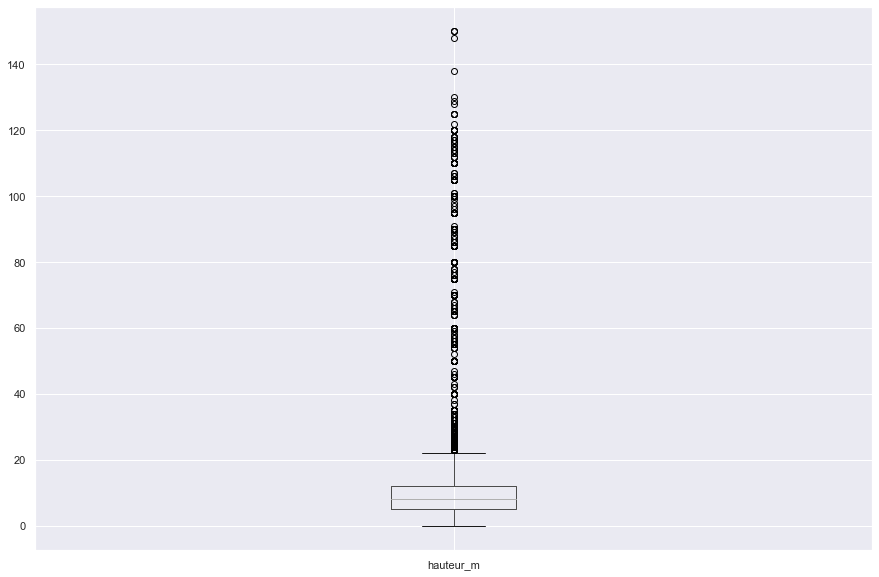

In [176]:
data.drop(data.index[(data["hauteur_m"] > 150)], axis=0, inplace=True)
height_boxplot = data.boxplot(column=['hauteur_m'])
height_boxplot

# Important values

In [177]:
columns = getColumns(data)
row_count = getTreeNumber(data)
PARIS_LOCATION = (48.856614, 2.3522219)

Total number of trees: 199983 



## Showing how many values are missing in each column

<AxesSubplot:>

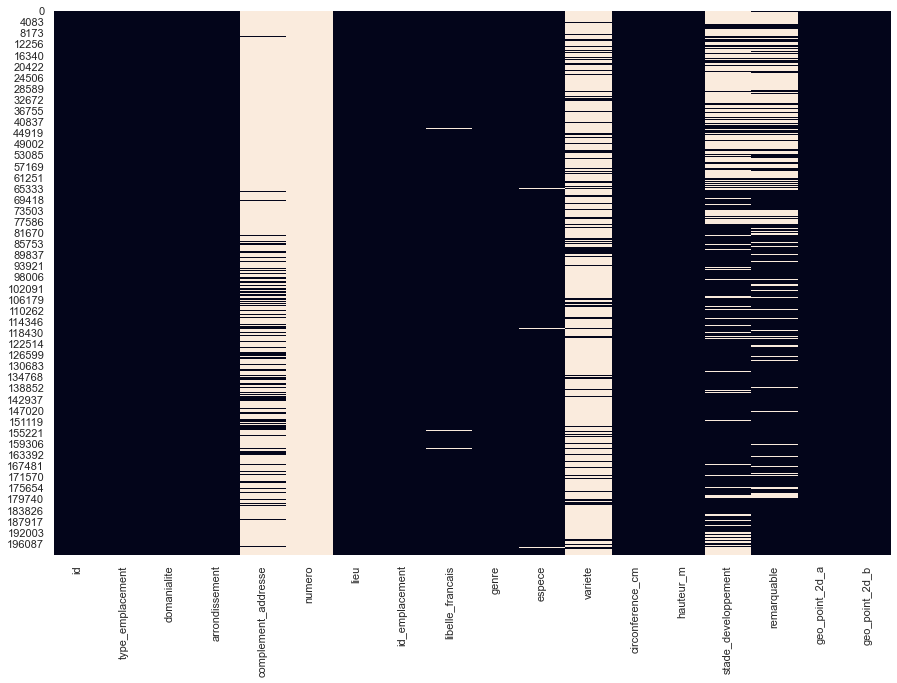

In [178]:
# missing_values = msno.bar(data)
sns.heatmap(data.isnull(), cbar=False)

# Data cleanup

We remove columns we won't be using for our study, either because they aren't useful or because they aren't filled with enough data.
We also remove lines that weren't filled correctly, for example if the tree circunference or height is equal to 0, or if the tree is taller or wider than the biggest tree known in Paris.

In [144]:
# Removing unwanted columns from data frame
def cleaningColumns(dataF):
    dataF.drop(['type_emplacement', 'domanialite', 'complement_addresse','numero'], axis=1, inplace=True)
    dataF.drop(['id_emplacement','variete', 'remarquable'], axis=1, inplace=True)
    return dataF

# Removing unwanted lines from data frame
def cleaningRows(dataF):
    dataF.drop(dataF.index[(dataF["circonference_cm"] <= 0)], axis=0, inplace=True)
    dataF.drop(dataF.index[(dataF["hauteur_m"] <= 0)], axis=0, inplace=True)
    # biggest circumference paris tree 8m -> 800 cm
    dataF.drop(dataF.index[(dataF["circonference_cm"] > 900)], axis=0, inplace=True)
    # tallest paris tree 35 m -> 3500 cm
    dataF.drop(dataF.index[(dataF["hauteur_m"] > 40)], axis=0, inplace=True)
    return dataF

In [145]:
# Data clean up
data = cleaningColumns(data)
data = cleaningRows(data)
data = data.drop_duplicates()

# Data after cleanup

In [146]:
# Save cleaned up csv
data.to_csv('./resources/cleanedDF.csv', encoding='utf-8', sep=';', index=False)
data.reset_index(drop=True)

,id,arrondissement,lieu,libelle_francais,genre,espece,circonference_cm,hauteur_m,stade_developpement,geo_point_2d_a,geo_point_2d_b
0,99874,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Marronnier,Aesculus,hippocastanum,20,5,NaN,48.857620,2.320962
1,99875,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,65,8,A,48.857656,2.321031
2,99876,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,90,10,A,48.857705,2.321061
3,99877,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Erable,Acer,negundo,60,8,A,48.857722,2.321006
4,99881,PARIS 16E ARRDT,SQUARE ALEXANDRE ET RENE PARODI / 1 PLACE DE L...,Platane,Platanus,x hispanica,260,17,NaN,48.876722,2.280222
...,...,...,...,...,...,...,...,...,...,...,...
159979,2023464,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,Chêne,Quercus,cerris,20,5,NaN,48.848074,2.409116
159980,2023465,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,Chêne,Quercus,cerris,20,5,NaN,48.848226,2.409147
159981,2023466,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,Chêne,Quercus,cerris,20,5,NaN,48.848379,2.409179
159982,2023467,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,Chêne,Quercus,cerris,20,5,NaN,48.848533,2.409209


# Work on the data

## Species percentage in Paris

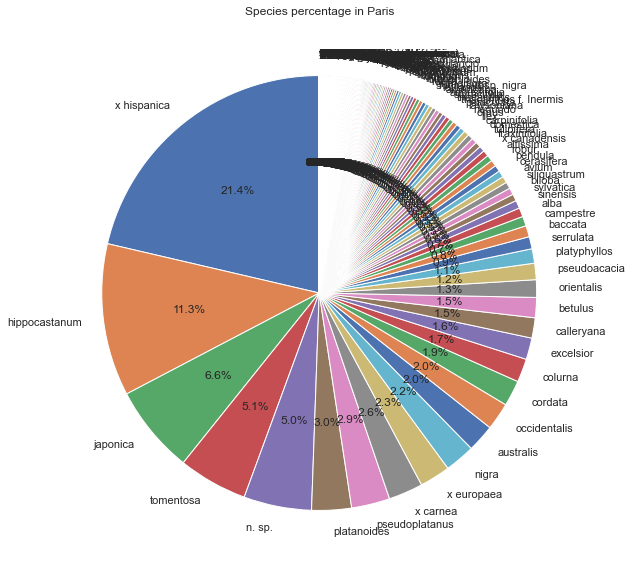

In [147]:
# Top 10 most present species in Paris
species_group = data.groupby(['espece']).size().sort_values(ascending=False)
species_group.plot(kind='pie', subplots=True, startangle=90, figsize=(15, 10), autopct='%1.1f%%')
plt.title('Species percentage in Paris')
plt.ylabel('')
plt.show()

## Top 10 most present species

In [148]:
top_species_df = species_group.head(10).reset_index(name='count')
top_species_list = []
species_to_delete = []

print("Ten most present species :")
for index, row in top_species_df.iterrows():
    specie = top_species_df['espece'][index]
    top_species_list.append(specie)
    print(specie)

print("\nEvery species :")
for index, val in species_group.iteritems():
    if index not in top_species_list:
        species_to_delete.append(index)
    print(index, val)

Ten most present species :
x hispanica
hippocastanum
japonica
tomentosa
n. sp.
platanoides
pseudoplatanus
x carnea
x europaea
nigra

Every species :
x hispanica 33911
hippocastanum 17985
japonica 10431
tomentosa 8163
n. sp. 8007
platanoides 4689
pseudoplatanus 4529
x carnea 4062
x europaea 3620
nigra 3566
australis 3249
occidentalis 3233
cordata 3043
colurna 2764
excelsior 2543
calleryana 2391
betulus 2380
orientalis 2071
pseudoacacia 1928
platyphyllos 1703
serrulata 1439
baccata 1325
campestre 1141
alba 1057
sinensis 943
sylvatica 818
biloba 802
siliquastrum 784
avium 775
cerasifera 775
pendula 762
robur 748
altissima 727
x canadensis 719
fraxinifolia 669
tulipifera 639
domestica 639
carpinifolia 627
ilex 627
ornus 593
negundo 570
lawsoniana 539
paniculata 506
triacanthos f. Inermis 504
triacanthos 491
styraciflua 474
angustifolia 464
americana 453
leylandii 452
nigra subsp. nigra 438
grandiflora 434
rubra 408
bignonioides 393
indica 355
lucidum 349
communis 323
libani 315
saccharinum

## 10 most present species percentage for each district

In [149]:
species_district_df = data.groupby(['arrondissement', 'espece'], dropna=True).size().reset_index(name="count")

# Removing species which aren't in top_species_list
for specie in species_to_delete:
    species_district_df.drop(species_district_df.index[(species_district_df["espece"] == specie)], axis=0, inplace=True)
"""
for i in range(len(species_district_df)):
    district = species_district_df["arrondissement"][i]
    specie = species_district_df["espece"][i]
    count = species_district_df["count"][i]
    print(district, ":", count, specie)
"""
species_district_df

,arrondissement,espece,count
16,BOIS DE BOULOGNE,hippocastanum,958
17,BOIS DE BOULOGNE,japonica,8
21,BOIS DE BOULOGNE,n. sp.,8
22,BOIS DE BOULOGNE,nigra,1
29,BOIS DE BOULOGNE,platanoides,45
...,...,...,...
2933,VAL-DE-MARNE,platanoides,324
2937,VAL-DE-MARNE,pseudoplatanus,291
2950,VAL-DE-MARNE,tomentosa,6
2955,VAL-DE-MARNE,x europaea,108


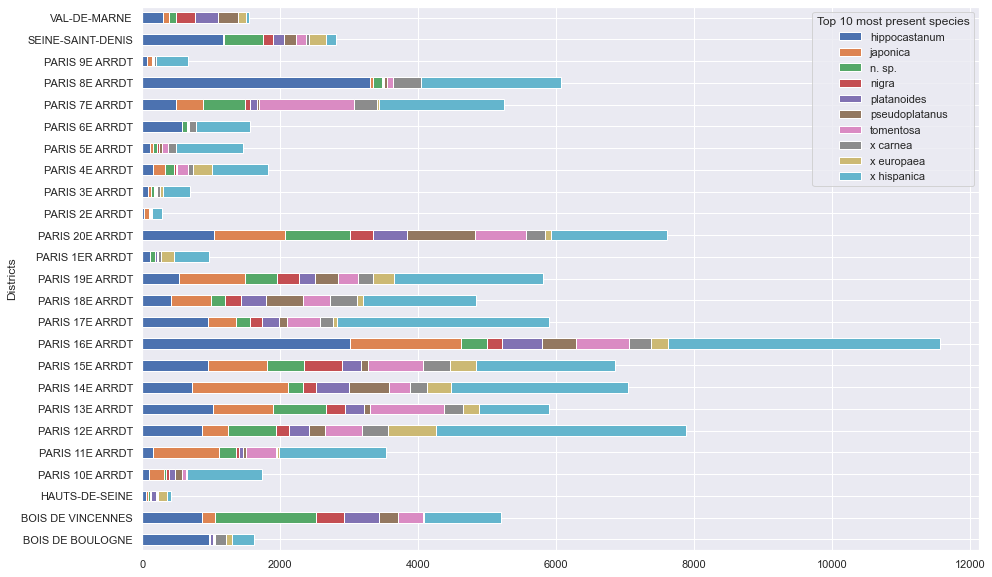

In [150]:
# reshape the dataframe
species_district_dfpivot = species_district_df.pivot(index=['arrondissement'], columns=['espece'], values='count')

# plot stacked bars
species_district_dfpivot.plot(kind='barh', stacked=True, rot=0, figsize=(15, 10),
                              xlabel='Districts', ylabel='Species frequency')
plt.legend(title = "Top 10 most present species")
plt.show()

## Tree number percentage per district

### Districts' geolocalisation

In [151]:
first_of_each_district_df = data.groupby(['arrondissement']).nth(0).reset_index()
first_of_each_district_df.drop(['id','lieu', 'stade_developpement', 'circonference_cm', 'hauteur_m', 'genre', 'espece', 'libelle_francais'], axis=1, inplace=True)

district_geoloc = {}
for i in range(len(first_of_each_district_df)):
    loc_a_index = first_of_each_district_df["geo_point_2d_a"][i]
    loc_b_index =  first_of_each_district_df["geo_point_2d_b"][i]
    index = first_of_each_district_df["arrondissement"][i]
    coordinates = (loc_a_index, loc_b_index)
    district_geoloc[index] = coordinates
    
first_of_each_district_df

,arrondissement,geo_point_2d_a,geo_point_2d_b
0,BOIS DE BOULOGNE,48.857614,2.262362
1,BOIS DE VINCENNES,48.841751,2.449273
2,HAUTS-DE-SEINE,48.804707,2.310855
3,PARIS 10E ARRDT,48.878544,2.368362
4,PARIS 11E ARRDT,48.864818,2.381492
5,PARIS 12E ARRDT,48.835428,2.380136
6,PARIS 13E ARRDT,48.821805,2.376479
7,PARIS 14E ARRDT,48.821643,2.340703
8,PARIS 15E ARRDT,48.831192,2.299643
9,PARIS 16E ARRDT,48.876722,2.280222


### Show species in each districts

In [152]:
# TODO
species_map = data.groupby(['arrondissement','espece'])
species_map.size()

arrondissement    espece       
BOIS DE BOULOGNE  americana          5
                  angustifolia       9
                  aria              18
                  australis         51
                  avium             48
                                  ... 
VAL-DE-MARNE      utilis             1
                  x europaea       108
                  x fraseri          3
                  x hispanica       40
                  x soulangeana      1
Length: 2959, dtype: int64

### District surface

In [153]:
# Surface in km2
surface_dict = {
                'BOIS DE BOULOGNE'   : 8.46,
                'BOIS DE VINCENNES'  : 9.95,
                'HAUTS-DE-SEINE'	 : 176,
                'PARIS 10E ARRDT'	 : 2.89,
                'PARIS 11E ARRDT'	 : 3.67,
                'PARIS 12E ARRDT'	 : 16.32,
                'PARIS 13E ARRDT'	 : 7.15,
                'PARIS 14E ARRDT'	 : 5.64,
                'PARIS 15E ARRDT'	 : 8.48,
                'PARIS 16E ARRDT'	 : 7.91,
                'PARIS 17E ARRDT'	 : 5.67,
                'PARIS 18E ARRDT'	 : 6.01,
                'PARIS 19E ARRDT'	 : 6.79,
                'PARIS 1ER ARRDT'	 : 1.83,
                'PARIS 20E ARRDT'	 : 5.98,
                'PARIS 2E ARRDT' 	 : 0.99,
                'PARIS 3E ARRDT' 	 : 1.17,
                'PARIS 4E ARRDT' 	 : 1.60,
                'PARIS 5E ARRDT' 	 : 2.54,
                'PARIS 6E ARRDT' 	 : 2.15,
                'PARIS 7E ARRDT' 	 : 4.09,
                'PARIS 8E ARRDT' 	 : 3.88,
                'PARIS 9E ARRDT' 	 : 2.18,
                'SEINE-SAINT-DENIS'  : 236,
                'VAL-DE-MARNE'       : 245,
                }

### Drawing on map

In [154]:
# Tree number per district
numb_per_district = data.groupby(['arrondissement']).size()

# Creating map
m = folium.Map(location=[48.856614, 2.3522219], width=750, height=500)

# Placing markers for each district on the map
for index, value in numb_per_district.items():
    if index in district_geoloc:
        localisation = district_geoloc[index]
        density = surface_dict[index] / value * 100
        text = str(value) + " trees are planted in " + index + '. \n ---\nDensity: ' + str(round(density, 5)) + ' trees per m²'
        marker = folium.Circle(
                    location=localisation, 
                    radius=value/10, 
                    fill=True,
                    popup=text
                    )
        marker.add_to(m)

# Printing
m

## Tree number percentage per place

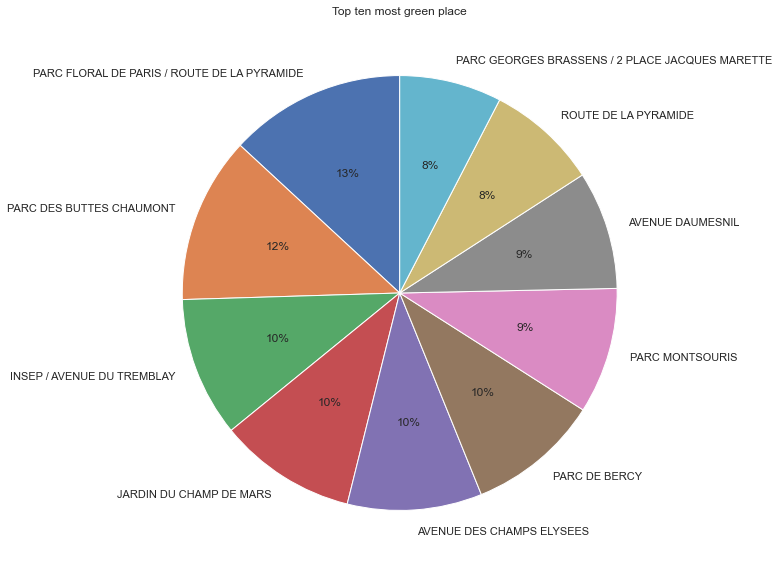

In [155]:
# Tree number percentage per place
place_group = data.groupby(['lieu']).size().sort_values(ascending=False)
place_group.head(10).plot(kind='pie', subplots=True, startangle=90, figsize=(15, 10), autopct='%.0f%%')

plt.title('Top ten most green place')
plt.ylabel('')
plt.show()

# Height, circumference and development stage

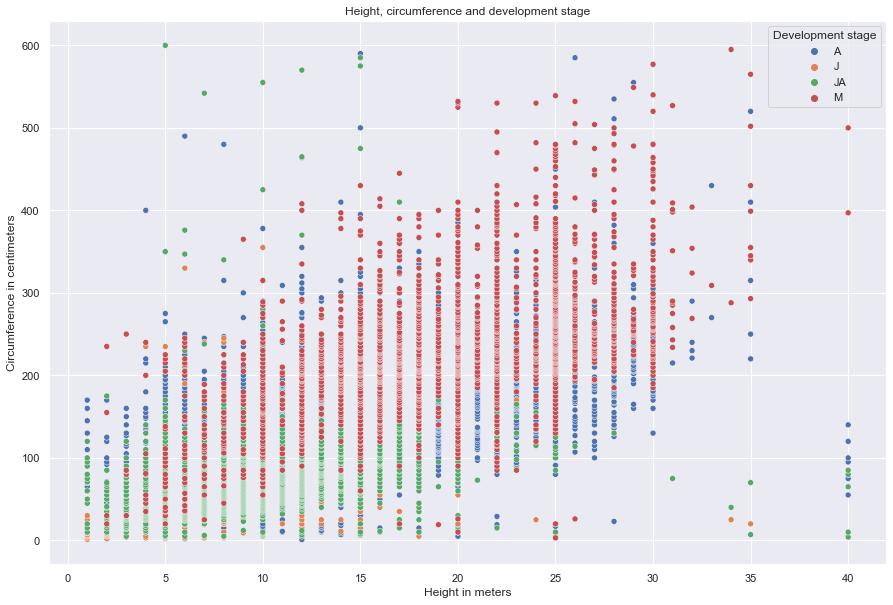

In [156]:
scatter = data.groupby(['stade_developpement', 'hauteur_m', 'circonference_cm'], dropna=True)
sns.set(rc={"figure.figsize":(15, 10)})
ax = sns.scatterplot(data=scatter.size(), 
                     x='hauteur_m', 
                     y='circonference_cm', 
                     hue='stade_developpement')
ax.set(xlabel='Height in meters',
       ylabel='Circumference in centimeters',
       title='Height, circumference and development stage')
plt.legend(loc='upper right', title='Development stage')
plt.show()

## Average height per arrondissement

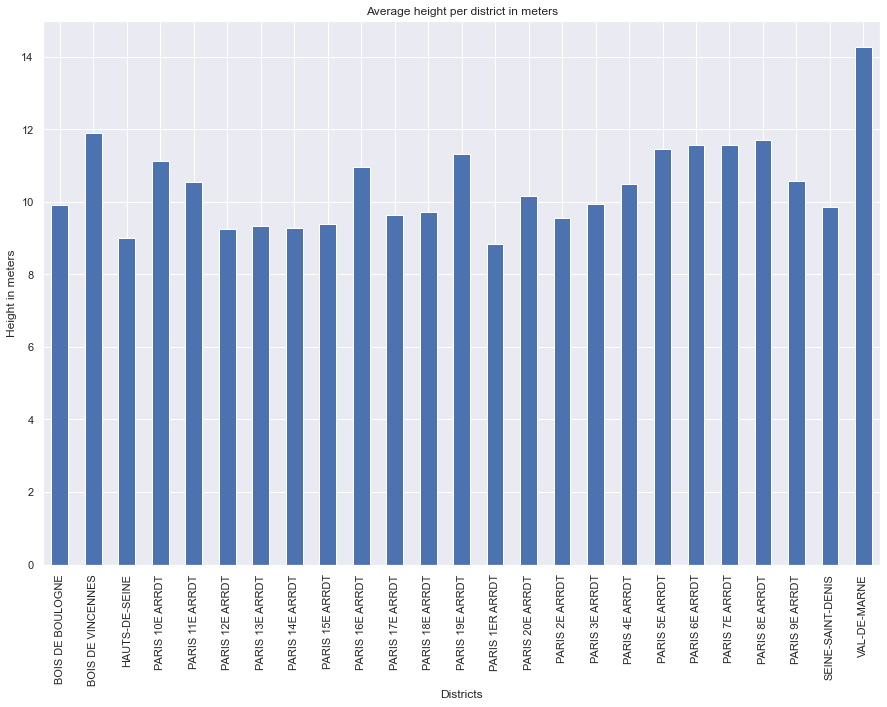

In [157]:
# Average height per arrondissement
height_mean = data.groupby(['arrondissement'])['hauteur_m'].mean().reset_index().plot(x='arrondissement',
                                                                                       y='hauteur_m',
                                                                                       kind='bar', 
                                                                                       subplots=True,
                                                                                       figsize=(15, 10),
                                                                                       legend=None)
plt.title('Average height per district in meters')
plt.xlabel('Districts')
plt.ylabel('Height in meters')
plt.savefig("./resources/average_height_per_arrondissement.png")
plt.show()

## Average circumference per district

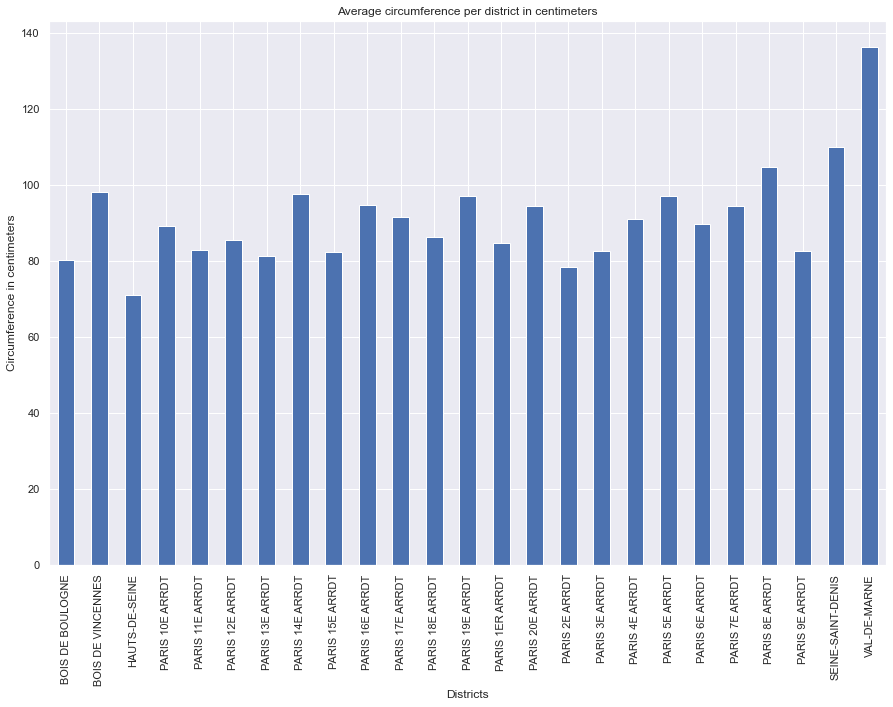

In [158]:
# Circumference average per arrondissement
circum_mean = data.groupby(['arrondissement'])['circonference_cm'].mean().reset_index().plot(kind='bar',
                                                                                             x='arrondissement',
                                                                                             y='circonference_cm',
                                                                                             subplots=True,
                                                                                             figsize=(15, 10),
                                                                                             legend=None)
plt.title('Average circumference per district in centimeters')
plt.xlabel('Districts')
plt.ylabel('Circumference in centimeters')
plt.savefig("./resources/average_circumference_per_district.png")
plt.show()